### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [43]:
import tensorflow as tf
tf.random.set_seed(42)

In [44]:
tf.__version__

'2.0.0'

### Collect Data

In [45]:
import keras

In [46]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [47]:
print(testY[0:5])

[9 2 1 1 6]


In [48]:
print(trainY[0:5])

[9 0 0 3 0]


In [49]:
print(trainX[0][0:10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [50]:
trainX.shape

(60000, 28, 28)

In [51]:
trainY.shape

(60000,)

In [52]:
trainY[0:30]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1,
       4, 8, 4, 3, 0, 2, 4, 4], dtype=uint8)

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [53]:
trainY = tf.keras.utils.to_categorical(trainY)
testY = tf.keras.utils.to_categorical(testY)

In [55]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

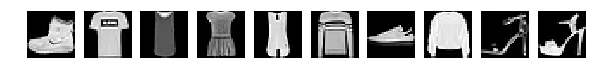

label for each of the above image:
9 0 0 3 0 2 7 2 5 5


In [61]:
label = [9,0,0,3,0,2,7,2,5,5]

In [62]:
label

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]

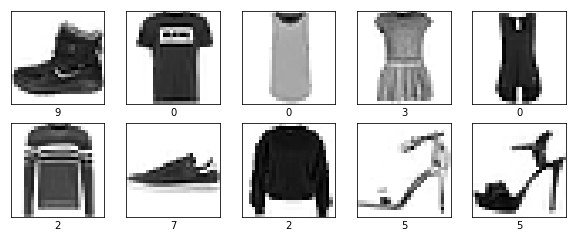

In [65]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(label[i])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [94]:
model = tf.keras.models.Sequential()

In [95]:
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [96]:
#hidden layers
model.add(tf.keras.layers.Dense(200, activation='sigmoid'))
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(50, activation='sigmoid'))

In [97]:
#output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [98]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [99]:
model.fit(trainX,trainY,validation_data=(testX,testY),epochs=100,batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 66us/sample - loss: 1.9555 - accuracy: 0.4874 - val_loss: 1.5283 - val_accuracy: 0.6206
Epoch 2/100
60000/60000 [==============================] - 4s 64us/sample - loss: 1.2633 - accuracy: 0.6357 - val_loss: 1.0840 - val_accuracy: 0.6481
Epoch 3/100
60000/60000 [==============================] - 4s 63us/sample - loss: 0.9525 - accuracy: 0.6868 - val_loss: 0.8617 - val_accuracy: 0.7141
Epoch 4/100
60000/60000 [==============================] - 4s 61us/sample - loss: 0.7870 - accuracy: 0.7337 - val_loss: 0.7439 - val_accuracy: 0.7396
Epoch 5/100
60000/60000 [==============================] - 4s 62us/sample - loss: 0.6957 - accuracy: 0.7614 - val_loss: 0.6804 - val_accuracy: 0.7696
Epoch 6/100
60000/60000 [==============================] - 4s 61us/sample - loss: 0.6500 - accuracy: 0.7756 - val_loss: 0.6516 - val_accuracy: 0.7716
Epoch 7/100
60000/60000 [=========================

Epoch 55/100
60000/60000 [==============================] - 4s 62us/sample - loss: 0.6233 - accuracy: 0.7742 - val_loss: 0.6216 - val_accuracy: 0.7813
Epoch 56/100
60000/60000 [==============================] - 4s 63us/sample - loss: 0.6218 - accuracy: 0.7732 - val_loss: 0.6521 - val_accuracy: 0.7446
Epoch 57/100
60000/60000 [==============================] - 4s 63us/sample - loss: 0.6288 - accuracy: 0.7703 - val_loss: 0.6756 - val_accuracy: 0.7439
Epoch 58/100
60000/60000 [==============================] - 4s 59us/sample - loss: 0.6212 - accuracy: 0.7737 - val_loss: 0.6786 - val_accuracy: 0.7576
Epoch 59/100
60000/60000 [==============================] - 4s 59us/sample - loss: 0.6391 - accuracy: 0.7658 - val_loss: 0.7000 - val_accuracy: 0.7161
Epoch 60/100
60000/60000 [==============================] - 4s 65us/sample - loss: 0.6289 - accuracy: 0.7692 - val_loss: 0.6689 - val_accuracy: 0.7473
Epoch 61/100
60000/60000 [==============================] - 4s 60us/sample - loss: 0.6318 - ac

In [101]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_10 (Reshape)         (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_37 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_38 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_39 (Dense)             (None, 10)                510       
Total params: 182,660
Trainable params: 182,660
Non-trainable params: 0
_________________________________________________________________


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [102]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Dense(200, activation='sigmoid'))
model1.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model1.add(tf.keras.layers.Dense(50, activation='sigmoid'))
model1.add(tf.keras.layers.Dense(10, activation='softmax'))
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [103]:
model1.fit(trainX,trainY,validation_data=(testX,testY),epochs=100,batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 73us/sample - loss: 2.1270 - accuracy: 0.4060 - val_loss: 1.8194 - val_accuracy: 0.5127
Epoch 2/100
60000/60000 [==============================] - 4s 73us/sample - loss: 1.5119 - accuracy: 0.5868 - val_loss: 1.2384 - val_accuracy: 0.6553
Epoch 3/100
60000/60000 [==============================] - 4s 71us/sample - loss: 1.0841 - accuracy: 0.6720 - val_loss: 0.9318 - val_accuracy: 0.7119
Epoch 4/100
60000/60000 [==============================] - 4s 69us/sample - loss: 0.8620 - accuracy: 0.7188 - val_loss: 0.7745 - val_accuracy: 0.7357
Epoch 5/100
60000/60000 [==============================] - 4s 68us/sample - loss: 0.7470 - accuracy: 0.7369 - val_loss: 0.6921 - val_accuracy: 0.7526
Epoch 6/100
60000/60000 [==============================] - 4s 70us/sample - loss: 0.6816 - accuracy: 0.7532 - val_loss: 0.6424 - val_accuracy: 0.7660
Epoch 7/100
60000/60000 [=========================

Epoch 55/100
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2937 - accuracy: 0.8939 - val_loss: 0.3421 - val_accuracy: 0.8750
Epoch 56/100
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2922 - accuracy: 0.8956 - val_loss: 0.3435 - val_accuracy: 0.8748
Epoch 57/100
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2872 - accuracy: 0.8967 - val_loss: 0.3410 - val_accuracy: 0.8750
Epoch 58/100
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2861 - accuracy: 0.8970 - val_loss: 0.3422 - val_accuracy: 0.8770
Epoch 59/100
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2810 - accuracy: 0.8989 - val_loss: 0.3399 - val_accuracy: 0.8755
Epoch 60/100
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2797 - accuracy: 0.8999 - val_loss: 0.3365 - val_accuracy: 0.8768
Epoch 61/100
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2773 - ac

In [104]:
model1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_11 (Reshape)         (None, 784)               0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 784)               3136      
_________________________________________________________________
dense_40 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_41 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_42 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_43 (Dense)             (None, 10)                510       
Total params: 185,796
Trainable params: 184,228
Non-trainable params: 1,568
___________________________________________

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [133]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(200, activation='sigmoid'))
model2.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model2.add(tf.keras.layers.Dense(50, activation='sigmoid'))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))
tf.keras.optimizers.SGD(learning_rate=0.001)

In [134]:
model2.compile(loss='categorical_crossentropy', optimizer='sgd')

In [135]:
model2.fit(trainX,trainY,validation_data=(testX,testY),epochs=100,batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 70us/sample - loss: 2.1469 - val_loss: 1.8537
Epoch 2/100
60000/60000 [==============================] - 4s 62us/sample - loss: 1.5510 - val_loss: 1.2865
Epoch 3/100
60000/60000 [==============================] - 4s 63us/sample - loss: 1.1399 - val_loss: 0.9874
Epoch 4/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.9108 - val_loss: 0.8115
Epoch 5/100
60000/60000 [==============================] - 4s 65us/sample - loss: 0.7746 - val_loss: 0.7106
Epoch 6/100
60000/60000 [==============================] - 4s 62us/sample - loss: 0.6960 - val_loss: 0.6527
Epoch 7/100
60000/60000 [==============================] - 4s 66us/sample - loss: 0.6465 - val_loss: 0.6124
Epoch 8/100
60000/60000 [==============================] - 4s 66us/sample - loss: 0.6105 - val_loss: 0.5811
Epoch 9/100
60000/60000 [==============================] - 4s 74us/sample - loss: 0.58

Epoch 76/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2433 - val_loss: 0.3237
Epoch 77/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2399 - val_loss: 0.3230
Epoch 78/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2385 - val_loss: 0.3210
Epoch 79/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2350 - val_loss: 0.3254
Epoch 80/100
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2341 - val_loss: 0.3294
Epoch 81/100
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2318 - val_loss: 0.3220
Epoch 82/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2292 - val_loss: 0.3232
Epoch 83/100
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2251 - val_loss: 0.3228
Epoch 84/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2247 - val_loss: 0.3258
Epoch 85/100
60000/

In [136]:
model2.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_24 (Reshape)         (None, 784)               0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 784)               3136      
_________________________________________________________________
dense_88 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_89 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_90 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_91 (Dense)             (None, 10)                510       
Total params: 185,796
Trainable params: 184,228
Non-trainable params: 1,568
___________________________________________

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [123]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model3.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model3.add(tf.keras.layers.Dense(10, activation='softmax'))
tf.keras.optimizers.SGD(learning_rate=0.03)

In [128]:
model3.compile(loss='categorical_crossentropy', optimizer='sgd')

## Review model

In [130]:
model3.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_23 (Reshape)         (None, 784)               0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 784)               3136      
_________________________________________________________________
dense_85 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_86 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_87 (Dense)             (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [132]:
model1.fit(trainX,trainY,validation_data=(testX,testY),epochs=100,batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1828 - accuracy: 0.9353 - val_loss: 0.3313 - val_accuracy: 0.8865
Epoch 2/100
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1837 - accuracy: 0.9346 - val_loss: 0.3357 - val_accuracy: 0.8817
Epoch 3/100
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1813 - accuracy: 0.9353 - val_loss: 0.3312 - val_accuracy: 0.8860
Epoch 4/100
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1792 - accuracy: 0.9362 - val_loss: 0.3308 - val_accuracy: 0.8864
Epoch 5/100
60000/60000 [==============================] - 4s 75us/sample - loss: 0.1766 - accuracy: 0.9371 - val_loss: 0.3345 - val_accuracy: 0.8855
Epoch 6/100
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1749 - accuracy: 0.9370 - val_loss: 0.3376 - val_accuracy: 0.8865
Epoch 7/100
60000/60000 [=========================

Epoch 55/100
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1061 - accuracy: 0.9626 - val_loss: 0.3877 - val_accuracy: 0.8858
Epoch 56/100
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1060 - accuracy: 0.9630 - val_loss: 0.3890 - val_accuracy: 0.8823
Epoch 57/100
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1048 - accuracy: 0.9635 - val_loss: 0.3873 - val_accuracy: 0.8824
Epoch 58/100
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1060 - accuracy: 0.9634 - val_loss: 0.3874 - val_accuracy: 0.8847
Epoch 59/100
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1019 - accuracy: 0.9641 - val_loss: 0.3922 - val_accuracy: 0.8842
Epoch 60/100
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1030 - accuracy: 0.9639 - val_loss: 0.3899 - val_accuracy: 0.8855
Epoch 61/100
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1018 - ac